<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/009_TensorFlow2%E6%95%99%E7%A8%8B_%E8%87%AA%E7%BC%96%E7%A0%81%E5%99%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## autoencoder
自动编码器的两个主要组成部分; 编码器和解码器 编码器将输入压缩成一小组“编码”（通常，编码器输出的维数远小于编码器输入） 解码器然后将编码器输出扩展为与编码器输入具有相同维度的输出 换句话说，自动编码器旨在“重建”输入，同时学习数据的有限表示（即“编码”）

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from IPython.display import SVG

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.reshape((-1,28*28))/255.0
x_test = x_test.reshape((-1,28*28))/255.0


In [6]:
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 784)   (60000,)
(10000, 784)   (10000,)


## 2.简单的自编码器

In [8]:
code_dim =32
inputs = layers.Input(shape=(x_train.shape[1],),name='inputs')
code = layers.Dense(code_dim,activation='relu',name='code')(inputs)
outputs = layers.Dense(x_train.shape[1],activation='softmax',name='outputs')(code)

auto_encode = keras.Model(inputs,outputs)
auto_encode.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
code (Dense)                 (None, 32)                25120     
_________________________________________________________________
outputs (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


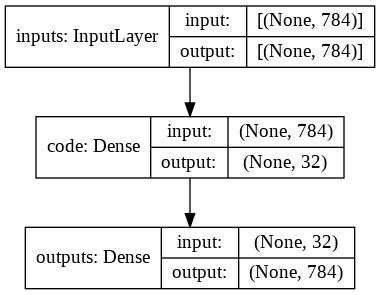

In [9]:
keras.utils.plot_model(auto_encode,show_shapes=True)

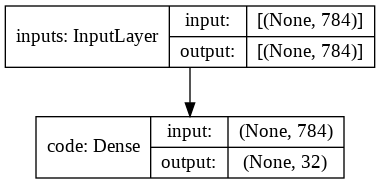

In [10]:
encoder = keras.Model(inputs,code)
keras.utils.plot_model(encoder,show_shapes=True)

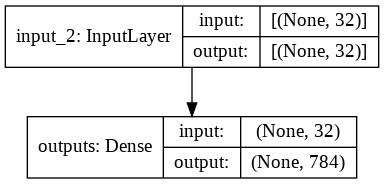

In [12]:
decoder_input = keras.Input((code_dim))
decoder_output = auto_encode.layers[-1](decoder_input)
decoder = keras.Model(decoder_input,decoder_output)
keras.utils.plot_model(decoder,show_shapes=True)

In [13]:
auto_encode.compile(optimizer='adam',loss='binary_crossentropy')


训练模型

In [15]:
history = auto_encode.fit(x_train, x_train, batch_size=64, epochs=100, validation_split=0.1)

Epoch 1/100
844/844 [==============================] - 4s 4ms/step - loss: 0.2734 - val_loss: 0.1375
Epoch 2/100
844/844 [==============================] - 3s 3ms/step - loss: 0.1291 - val_loss: 0.1109
Epoch 3/100
844/844 [==============================] - 3s 3ms/step - loss: 0.1071 - val_loss: 0.1008
Epoch 4/100
844/844 [==============================] - 3s 4ms/step - loss: 0.0993 - val_loss: 0.0971
Epoch 5/100
844/844 [==============================] - 3s 4ms/step - loss: 0.0962 - val_loss: 0.0960
Epoch 6/100
844/844 [==============================] - 3s 4ms/step - loss: 0.0952 - val_loss: 0.0952
Epoch 7/100
844/844 [==============================] - 3s 4ms/step - loss: 0.0948 - val_loss: 0.0949
Epoch 8/100
844/844 [==============================] - 3s 4ms/step - loss: 0.0944 - val_loss: 0.0946
Epoch 9/100
844/844 [==============================] - 3s 4ms/step - loss: 0.0942 - val_loss: 0.0946
Epoch 10/100
844/844 [==============================] - 3s 4ms/step - loss: 0.0940 - val_lo

In [17]:
encode = encoder.predict(x_test)
decode = decoder.predict(encode)

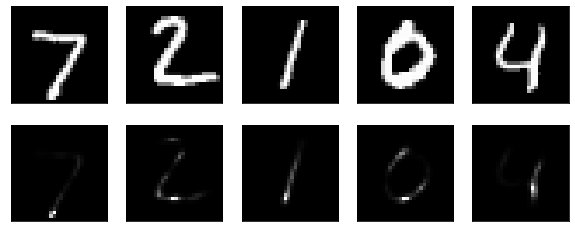

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

n = 5
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(decode[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Tensorflow2教程-卷积自编码器

In [1]:

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

In [2]:
(x_train_1, y_train_1), (x_test_1, y_test_1) = keras.datasets.mnist.load_data()

In [3]:
x_train_1.shape

(60000, 28, 28)

In [5]:
x_train_1 = tf.expand_dims(x_train_1.astype('float32'), -1) / 255.0
x_test_1 = tf.expand_dims(x_test_1.astype('float32'),-1) / 255.0

print(x_train_1.shape, ' ', y_train_1.shape)
print(x_test_1.shape, ' ', y_test_1.shape)

(60000, 28, 28, 1)   (60000,)
(10000, 28, 28, 1)   (10000,)


2.构造模型

In [6]:
inputs =layers.Input(shape=(x_train_1.shape[1],x_train_1.shape[2],x_train_1.shape[3]),name='inputs')
print(inputs.shape)
code = layers.Conv2D(16,(3,3),activation='relu',padding='same')(inputs)
print(code.shape)
code = layers.MaxPool2D((2,2),padding='same')(code)
print(code.shape)
decoded = layers.Conv2D(16,(3,3),activation='relu',padding='same')(code)
print(decoded.shape)
decoded = layers.UpSampling2D((2,2))(decoded)
print(decoded.shape)
outputs =layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(decoded)
print(outputs.shape)
auto_ecoder = keras.Model(inputs,outputs)

(None, 28, 28, 1)
(None, 28, 28, 16)
(None, 14, 14, 16)
(None, 14, 14, 16)
(None, 28, 28, 16)
(None, 28, 28, 1)


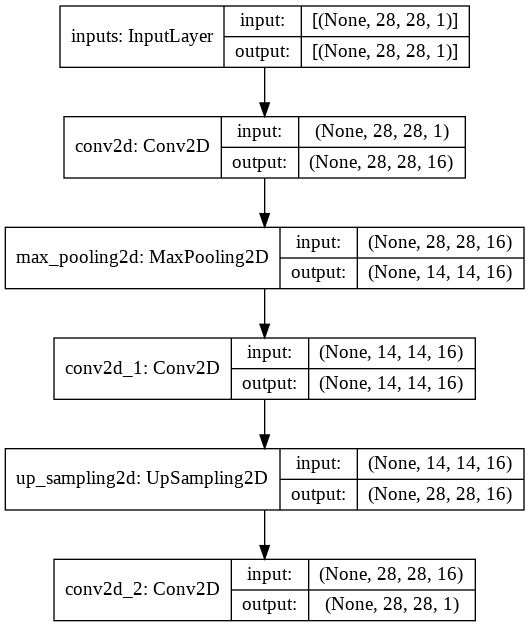

In [7]:
auto_ecoder.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.BinaryCrossentropy())
keras.utils.plot_model(auto_ecoder,show_shapes=True)


3.训练与测试

In [8]:
early_stop = keras.callbacks.EarlyStopping(patience=2,monitor='loss')
auto_ecoder.fit(x_train_1,x_train_1,batch_size=64,epochs=1,validation_split=0.1,validation_freq=10,callbacks=[early_stop])


844/844 [==============================] - 55s 64ms/step - loss: 0.1806


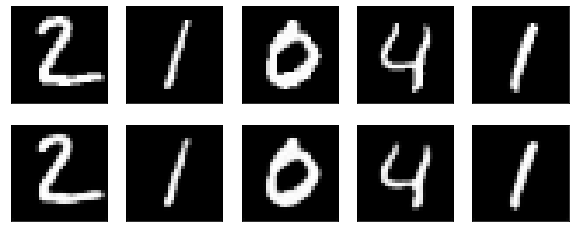

In [12]:
import matplotlib.pyplot as plt
decoded = auto_ecoder.predict(x_test_1)

n = 5
plt.figure(figsize=(10, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(tf.reshape(x_test_1[i+1],(28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(tf.reshape(decoded[i+1],(28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## TensorFlow2 教程-卷积变分自编码器

In [13]:
import tensorflow as tf

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio
print(tf.__version__)
from IPython import display

2.4.0


一、载入MNIST数据集



In [14]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

MNIST数据是手写数字识别的图像数据集，是经典的深度学习数据集。其中每个图片大小为28*28，即可用一个784维的向量来表示图片。其中向量的每个数值在0-255之间，表示像素强度。 我们使用MNIST数据集来进行卷积变分自编码的实验，我们首先需要对图像数据进行预处理。这里我们使用伯努利分别来对所有像素进行建模，同时对数据集进行静态二值化处理。

In [15]:
# 构建数据集

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

# 化到0-1之间
train_images /= 255.0
test_images /= 255.0

# 二值化
train_images[train_images>=0.5] = 1.0
train_images[train_images<0.5] = 0.0
test_images[test_images>=0.5] = 1.0
test_images[test_images<0.5] = 0.0

#　超参数
TRAIN_BUF=60000
BATCH_SIZE = 100
TEST_BUF = 10000

In [16]:
# 分批和打乱数据


train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(TRAIN_BUF).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices(test_images).shuffle(TEST_BUF).batch(BATCH_SIZE)

## 二、构建生成网络和推理网络
我们使用卷积网络来构建生成网络和推理网络。并使用x和z分别表示观测值和潜在变量<br>
### 生成网络
生成网络将隐变量作为输入，并输出用于观测条件分布的参数p(x|z).我们对隐变量使用单位高斯先验分布。<br>
### 推理网络
这里定义了近似后验分布q(z|x) ，该后验分布以观测值作为输入，并输出用于潜在表示的条件分布的一组参数。在本示例中，我们仅将此分布建模为对角高斯模型。在这种情况下，推断网络将输出因式分解的高斯均值和对数方差参数
### 采样
我们从q(z|x)中采样，方法是先从单位高斯中采样，然后乘以标注差并加上平均值。这样可以确保梯度能确保梯度能传回推理网络。
### 网络结构
对于推理网络，我们使用了两个卷积层加一个全连接层，而对于生成网络，我们使用全连接层加3个反卷积层。 注意：训练VAE过程中要避免使用批归一化，因为这样会导致额外的随机性，从而加剧随机抽样的不稳定性

In [19]:
class CVAE(tf.keras.Model):
  def __init__(self,latent_dim):
    super(CVAE,self).__init__()
    self.latent_dim = latent_dim
    self.inference_net = tf.keras.Sequential(
        [tf.keras.layers.InputLayer(input_shape=(28,28,1)),
         tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu'),
         tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),activation='relu'),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(latent_dim + latent_dim)
    ])
    self.generative_net = tf.keras.Sequential(
        [tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
         tf.keras.layers.Dense(units=7*7*32, activation='relu'),
         tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
         tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=(2, 2),padding='SAME', activation='relu'),
         tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=(2, 2),padding='SAME', activation='relu'),
         # 不使用激活函数
         tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=(1, 1),padding='SAME'),                                      
    ])
  @tf.function
  def sample(self,eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100,self.latent_dim))
    return self.decode(eps,apply_sigmoid=True)

  def encode(self,x):
    mean,logvar = tf.split(self.inference_net(x),num_or_size_splits=2,axis=1)
    return mean,logvar


  def reparameterize(self,mean,logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps*tf.exp(logvar*0.5)+mean

  def decode(self,z,apply_sigmoid=False):
    logits = self.generative_net(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits



三、定义损失函数和优化器

In [20]:
optimizer = tf.keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2.0 * np.pi)
    return tf.reduce_sum(
    -0.5*((sample -mean)**2.0 * tf.exp(-logvar)+logvar+log2pi),
        axis=raxis
    )

@tf.function
def compute_loss(model, x):
    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    x_logit = model.decode(z)
    
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1,2,3])
    logpz = log_normal_pdf(z, 0.0, 0.0)
    logpz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z+logpz-logpz_x)

@tf.function
def compute_apply_gradients(model, x, optimizer):
    with tf.GradientTape() as tape:
        loss = compute_loss(model, x)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

四、训练¶
我们从迭代数据集开始：

在每次迭代期间，我们将图像传递给编码器，以获得近似后验q(z|x) 的一组均值和对数方差参数。
然后，我们从 q(z|x) 中采样分布。

最后，我们将重新参数化的样本传递给解码器，以获取生成分布 p(x|z) 的 logit。

注意：由于我们使用的是由 keras 加载的数据集，其中训练集中有 6 万个数据点，测试集中有 1 万个数据点，因此我们在测试集上的最终 ELBO 略高于对 Larochelle 版 MNIST 使用动态二值化的文献中的报告结果。

五、生成图片
进行训练后，可以生成一些图片了
我们首先从单位高斯先验分布 p(z) 中采样一组隐向量z
随后生成器将隐向量z 转换为观测值的 logit，得到分布 p(x|z)
这样我们就可以得到生成的图片

In [21]:
epochs = 100
latent_dim = 50
num_examples_to_generate = 16

# 保持随机向量恒定以进行生成（预测），以便看到改进。
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [22]:
# 使用输入生成图片
def generate_and_save_images(model, epoch, test_input):
    predictions = model.sample(test_input)
    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')

    # tight_layout 最小化两个子图之间的重叠
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

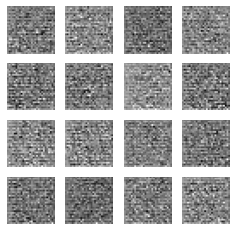

In [23]:
generate_and_save_images(model, 0, random_vector_for_generation)

Epoch: 100, Test set ELBO: -78.06269836425781, time elapse for current epoch 77.21485328674316


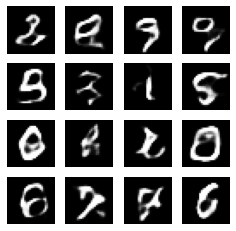

In [24]:
for epoch in range(1, epochs+1):
    start_time = time.time()
    for train_x in train_dataset:
        compute_apply_gradients(model, train_x, optimizer)
    end_time = time.time()
    if epoch % 1 == 0:
        loss = tf.keras.metrics.Mean()
        for test_x in test_dataset:
            loss(compute_loss(model, test_x))
        elbo = -loss.result()
        display.clear_output(wait=False)
        print('Epoch: {}, Test set ELBO: {}, '
          'time elapse for current epoch {}'.format(epoch,
                                                    elbo,
                                                    end_time - start_time))
        generate_and_save_images(model, epoch, random_vector_for_generation)

In [25]:
### 五、生成图片
def display_image(epoch_no):
    return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

(-0.5, 287.5, 287.5, -0.5)

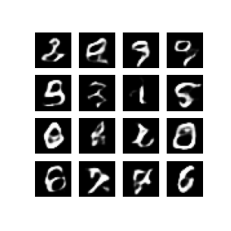

In [26]:
plt.imshow(display_image(epochs))
plt.axis('off')# 显示图片

In [27]:
# 生成gif
anim_file = 'cvae.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('image*.png')
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)
import IPython
if IPython.version_info >= (6,2,0,''):
    display.Image(filename=anim_file)